# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
!pip3 install scikit-learn --upgrade --user

Import libraries:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

Load the csv:


In [3]:
# Importing Data Set
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [116]:
# Display the first 5 columns of the dataframe
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [76]:

# Display the data types of each column using the function dtypes
for column in df.columns:
   print("Column Name: " + column + "\t -> Type: " ,df[column].dtypes)   
    

Column Name: Unnamed: 0	 -> Type:  int64
Column Name: id	 -> Type:  int64
Column Name: date	 -> Type:  object
Column Name: price	 -> Type:  float64
Column Name: bedrooms	 -> Type:  float64
Column Name: bathrooms	 -> Type:  float64
Column Name: sqft_living	 -> Type:  int64
Column Name: sqft_lot	 -> Type:  int64
Column Name: floors	 -> Type:  float64
Column Name: waterfront	 -> Type:  int64
Column Name: view	 -> Type:  int64
Column Name: condition	 -> Type:  int64
Column Name: grade	 -> Type:  int64
Column Name: sqft_above	 -> Type:  int64
Column Name: sqft_basement	 -> Type:  int64
Column Name: yr_built	 -> Type:  int64
Column Name: yr_renovated	 -> Type:  int64
Column Name: zipcode	 -> Type:  int64
Column Name: lat	 -> Type:  float64
Column Name: long	 -> Type:  float64
Column Name: sqft_living15	 -> Type:  int64
Column Name: sqft_lot15	 -> Type:  int64


In [5]:
# Use the method describe to obtain a statistical summary of the dataframe.
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [84]:
# Drop the columns "id" and "Unnamed: 0"from axis 1, then obtain a statistical summary of the data.

df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [6]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. 


In [7]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

Replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>.


In [8]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [9]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0



Count the number of houses with unique floor values and use the method to_frame() to convert it to a dataframe.


In [114]:
df1=df["floors"].value_counts().to_frame()
display(df1)

numberOfUniqueFloors = df1.count()[0]
print("Unique of floors: ", numberOfUniqueFloors )


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Unique of floors:  6



Use the boxplot function in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


From the boxplot, it seems that houses without a waterfront have more price outliers


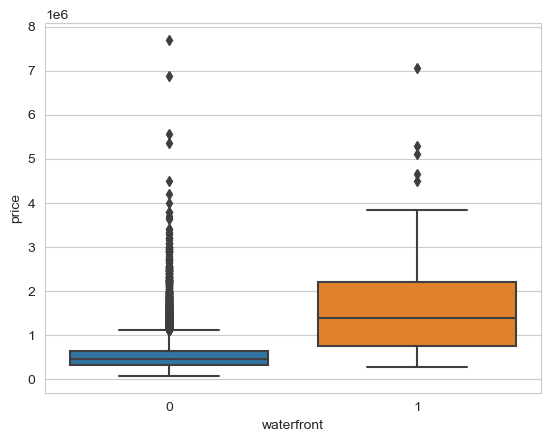

In [136]:
sns.boxplot(x=df["waterfront"], y=df["price"])
print("From the boxplot, it seems that houses without a waterfront have more price outliers")

Use regplot visualization to  determine if the feature 'sqft_above' is negatively or positively correlated with price.


From the plot below, it does seem that sqft_above is positively correlated with price


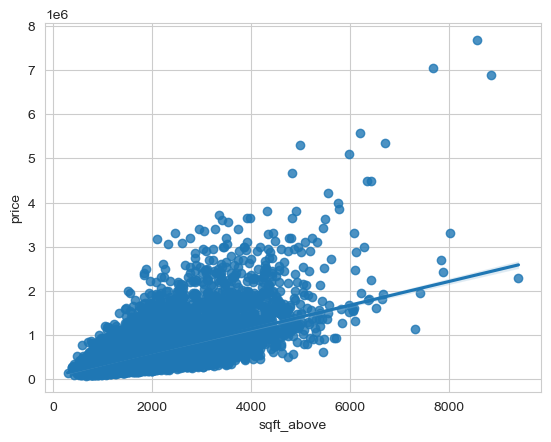

In [138]:
sns.regplot(x=df["sqft_above"], y=df["price"])
print("From the plot below, it does seem that sqft_above is positively correlated with price")


Use the Pandas method corr(), to find the feature other than price that is most correlated with price


In [10]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Fit a linear regression model using the longitude feature 'long' and caculate the R^2 value for the model.


In [11]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Fit a linear regression model to predict the 'price' using the 'sqft_living' feature and then calculate the R^2


In [142]:
# Import modules needed for data modeling  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print("done")

X1 = df[['sqft_living']]
Y1 = df['price']

x_train,x_test,y_train,y_test = train_test_split(X1,Y1)
L = LinearRegression()

L.fit(x_train,y_train)

y_pred=L.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))


R2 score:  0.5062864495273203


Fit a linear regression model to predict the 'price' using the list of features


In [12]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  


calculate the R^2


In [143]:
X2 = df[features]
Y2 = df['price']

x_train,x_test,y_train,y_test = train_test_split(X1,Y1)
L1 = LinearRegression()

L1.fit(x_train,y_train)

y_pred=L1.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))


R2 score:  0.48987952368930965



Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [13]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.


In [191]:
pipe = Pipeline(Input)
pipe.fit(df[features],df["price"])
y_pred_pipe=pipe.predict(df[features])

print("R2 score: ",r2_score(df["price"],y_pred_pipe))

R2 score:  0.7513404101380663


0.7513404101380663

Import modules:


done


Split the data into training and testing sets:


In [193]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [182]:
#Create ridge object

RR = Ridge(alpha=0.1)

# Fit the model

RR.fit(x_train,y_train)

y_pred_ridge= RR.predict(x_test)
print("R2 score for ridge:",r2_score(y_test,y_pred_ridge))

R2 score for ridge: 0.6478759163939112



Perform a second order polynomial transform on both the training data and testing data. 
Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data. 

In [203]:
pr = PolynomialFeatures(degree=2, include_bias=False)
#  second order polynomial transform on train data
x_poly_train=pr.fit_transform(x_train)
#  second order polynomial transform on test data
x_poly_test=pr.fit_transform(x_test)

#Create ridge object

RR1 = Ridge(alpha=0.1)

# Fit the model

RR1.fit(x_poly_train, y_train)

y_pred_poly_ridge= RR.predict(x_poly_test)

print("R2 score for ridge when 2nd order polynomial transformed :",r2_score(y_test,y_pred_poly_ridge))


R2 score for ridge when 2nd order polynomial transformed : 0.7002744261118423
